# ECE 4554/ ECE 5554 / Computer Vision
This file contains Problems 5 and 6 (the coding problems) for Homework 2. 
Your job is to implement/modify the sections within this notebook that are marked with "TO DO".

##**TO DO**: Enter your Virginia Tech Username (PID) here: _________906470552___________ 

##**Honor Code reminder**

This is not a "team project". Please review the Honor Code statement in the syllabus.  

##**Submission guidelines** for the coding problems (Google Colab)

1. Please verify that you have entered your Virginia Tech Username in all of the appropriate places.
2. After clicking Runtime->Run all, verify that all of your solutions are visible in this notebook.
3. Click File->Save near the top of the page to save the latest version of your notebook at Google Drive.
4. Verify that the last 2 cells have executed, creating a PDF version of this notebook at Google Drive. (Note: if you face difficulty with this step, please refer to https://pypi.org/project/notebook-as-pdf/)
5. Look at the PDF file and check that all of your solutions are displayed correctly there.
6. Download your notebook file and the PDF version to your laptop.
7. On your laptop, create a ZIP version of this notebook file. (Please don't include the separate data files.) Use file name Homework2_Code_USERNAME.zip, with your own Username.
6. For your PDF version, use file name Homework2_Notebook_USERNAME.pdf, with your own Username.
7. **<span style="color:blue"> Submit these 2 files and your PDF file for Problems 1-4 SEPARATELY to Canvas.**</span> Do not zip them all together.





# Environment Setup

In [87]:
# Mount your Google Drive to this notebook
# The purpose is to allow your code to access to your files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
# Change the directory to your own working directory
# Any files under your working directory are available to your code
# TO DO: enter the name of your directory
import os
os.chdir('/content/drive/MyDrive/ECE5554_Computer_Vision/HW2')
#os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [89]:
# Import library modules
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image # PIL is the Python Imaging Library
from google.colab.patches import cv2_imshow #(We cannot use cv2.imshow on Colab)

---
#Problem 5: Image filtering (10 points)

Write Python/OpenCV code that will apply a linear filter to an image. Demonstrate correct operation of your code by applying filters that are commonly used for smoothing edge detection. (These are low-pass and high-pass filters, respectively.)

For this problem, do not use any OpenCV functions other basic operations for loading/saving/displaying image files. During the filtering operation, your code must access pixel values directly, probably with nested 'for' loops. (We know that OpenCV has built-in functions that could be used here, such as cv2.filter2D and cv2.GaussianBlur, but you are not allowed to use them. The purpose of this problem is for you to gain a good understanding of operations at the pixel level.)

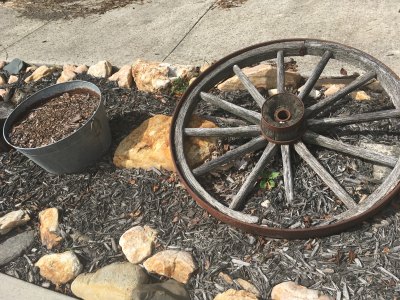

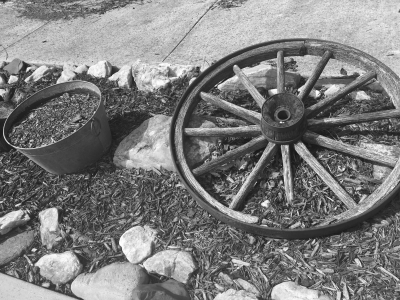

In [90]:
# GETTING STARTED
# Upload file wheel.png to your working directory. 
# Verify that you can input the image and convert it to grayscale format. 
# The resulting img_grayscale will be the input to the filtering operations below.

img_color = cv2.imread("wheel.png", cv2.IMREAD_COLOR)
cv2_imshow(img_color)

print ('\n')
img_grayscale = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_grayscale)

Write a Python function linear_filter() that accepts an image and a kernel as input parameters. Your function must create an output image by applying the kernel (also called "filter", "operator", "mask") to the input image. This new image is returned by your function.

In [91]:
def linear_filter(img_in, kernel):
  '''Filter an input image by applying cross-correlation with a kernel.

  Input: 
    img_in: a grayscale image of any size larger than the kernel
    kernel: a 2D array of floating-point values;
     you may assume that this array is square, 
     with an odd number of rows and an odd number of columns;
     use the *center* of this kernel as its point of reference for filtering.

  Output:
    img_out: an image with the same row/column size as img_in, 
     but each pixel is a floating-point value;
     apply the kernel only at locations where it fits entirely within the 
     input image; 
     the remaining pixels (near the outside border of the output image)
     must be set to zero;
     for any negative values, take the absolute value;
     clip the final output so that every pixel value lies in the range 0 to 255.

  TO DO: implement the function.
  '''

  r=(len(kernel)-1)/2
  k=int(r)
  rows = len(img_in)
  columns = len(img_in[0])
  img_out = np.zeros((rows, columns), dtype=np.float32)   # Temporary assignment; replace with your code


  for i in range(k, columns-k):
    for j in range(k, rows-k):
    
      #print('piecewise input image is:')
      #print(img_in[j-k:j+k+1, i-k:i+k+1])
      #print('multiplication is:')
      mult = np.multiply(kernel[0:len(kernel),0:len(kernel)], img_in[j-k:j+k+1, i-k:i+k+1])
      #print(mult)
      #print('summation is:')
      summation=np.sum(mult)
      #print(summation)
      #print('******')
      img_out[j,i]=min(abs(summation),np.float32(255))
      summation=0
      #print(j,i)
  
  print(img_in.max())
  print(img_out.max())
  #print(mult)
  print(img_in.shape[0])
  print(img_in.shape[1])
  print(img_in)
  print(img_out)
  print(img_out.dtype)
  return img_out # Each pixel must be of type np.float32




Test your linear_filter() function with the following commands.

254
249.16116
300
400
[[ 64  55  54 ... 197 200 188]
 [ 97  90  88 ... 195 192 185]
 [166 164 165 ... 199 199 195]
 ...
 [206 189 193 ...  96  88  78]
 [203 204 205 ...  68  60  74]
 [207 206 206 ...  78  79  72]]
[[  0.         0.         0.       ...   0.         0.         0.      ]
 [  0.         0.         0.       ...   0.         0.         0.      ]
 [  0.         0.       119.54945  ... 201.34065    0.         0.      ]
 ...
 [  0.         0.       201.04395  ...  96.652016   0.         0.      ]
 [  0.         0.         0.       ...   0.         0.         0.      ]
 [  0.         0.         0.       ...   0.         0.         0.      ]]
float32


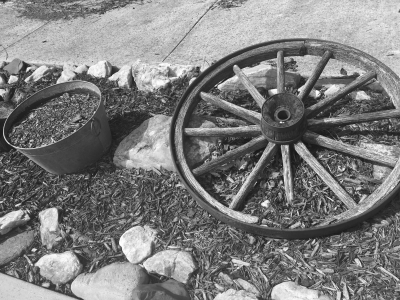

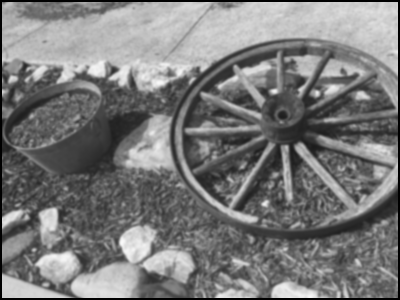

In [92]:
# Here is an example smoothing filter, 

kernel = np.array([
          [1, 4, 7, 4, 1],
          [4, 16, 26, 16, 4],
          [7, 26, 41, 26, 7],
          [4, 16, 26, 16, 4],
          [1, 4, 7, 4, 1,]], dtype=np.float32) / 273.0

# Apply the smoothing filter
img_result = linear_filter(img_grayscale, kernel)


# Plot both images to make it easy to see that they are the same size
cv2_imshow(img_grayscale)
cv2_imshow(img_result)




Create a new kernel of size 9x9, approximating a 2D Gaussian function with sigma = 1.5.  Apply this kernel to img_grayscale, and plot the result. 

(You must calculate these kernel coefficients yourself. You can use basic Python/NumPy math functions if you wish, but not any special OpenCV functions to create a kernel.)


In [93]:
    sigma=1.5
    filter_size = 9
    gaussian_filter = np.zeros((filter_size, filter_size), np.float32)
    m = filter_size//2
    n = filter_size//2
    
    for x in range(-m, m+1):
        for y in range(-n, n+1):
            x1 = 2*np.pi*(sigma**2)
            x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
            gaussian_filter[x+m, y+n] = (1/x1)*x2
    
    print(gaussian_filter)
    

[[5.7719331e-05 2.7345790e-04 8.3069177e-04 1.6179667e-03 2.0205958e-03
  1.6179667e-03 8.3069177e-04 2.7345790e-04 5.7719331e-05]
 [2.7345790e-04 1.2955664e-03 3.9355834e-03 7.6654698e-03 9.5730126e-03
  7.6654698e-03 3.9355834e-03 1.2955664e-03 2.7345790e-04]
 [8.3069177e-04 3.9355834e-03 1.1955246e-02 2.3285640e-02 2.9080246e-02
  2.3285640e-02 1.1955246e-02 3.9355834e-03 8.3069177e-04]
 [1.6179667e-03 7.6654698e-03 2.3285640e-02 4.5354236e-02 5.6640584e-02
  4.5354236e-02 2.3285640e-02 7.6654698e-03 1.6179667e-03]
 [2.0205958e-03 9.5730126e-03 2.9080246e-02 5.6640584e-02 7.0735529e-02
  5.6640584e-02 2.9080246e-02 9.5730126e-03 2.0205958e-03]
 [1.6179667e-03 7.6654698e-03 2.3285640e-02 4.5354236e-02 5.6640584e-02
  4.5354236e-02 2.3285640e-02 7.6654698e-03 1.6179667e-03]
 [8.3069177e-04 3.9355834e-03 1.1955246e-02 2.3285640e-02 2.9080246e-02
  2.3285640e-02 1.1955246e-02 3.9355834e-03 8.3069177e-04]
 [2.7345790e-04 1.2955664e-03 3.9355834e-03 7.6654698e-03 9.5730126e-03
  7.6654698

254
243.02467
300
400
[[ 64  55  54 ... 197 200 188]
 [ 97  90  88 ... 195 192 185]
 [166 164 165 ... 199 199 195]
 ...
 [206 189 193 ...  96  88  78]
 [203 204 205 ...  68  60  74]
 [207 206 206 ...  78  79  72]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
float32


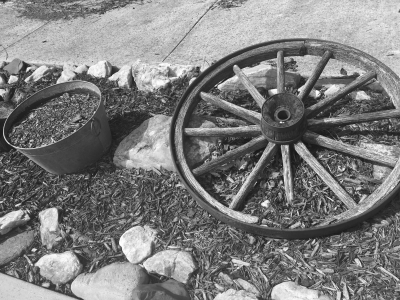

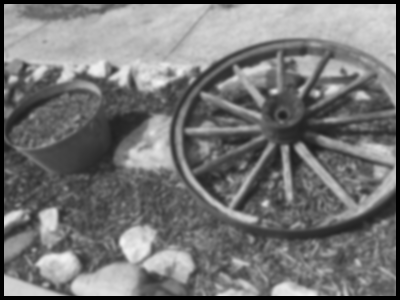

In [94]:


#print(img_grayscale)
# Apply the smoothing filter
img_result = linear_filter(img_grayscale, gaussian_filter)

# Plot both images to make it easy to see that they are the same size
cv2_imshow(img_grayscale)
cv2_imshow(img_result)


Create two new 3x3 kernels that contain the two Sobel operators (horizontal and vertical). Remember to normalize the kernels (i.e., divide by 4).  

Use your linear_filter() function to apply these two Sobel operators, creating two output images. Display the two output images, showing *magnitudes* of the computed pixel values.

Merge the two output images to create a third output image. Use any reasonable technique, such as pixelwise maximum, or pixelwise sum, or pixelwise magnitude. 

254
195.25
300
400
[[ 64  55  54 ... 197 200 188]
 [ 97  90  88 ... 195 192 185]
 [166 164 165 ... 199 199 195]
 ...
 [206 189 193 ...  96  88  78]
 [203 204 205 ...  68  60  74]
 [207 206 206 ...  78  79  72]]
[[  0.     0.     0.   ...   0.     0.     0.  ]
 [  0.   107.75  87.5  ...   2.5    1.75   0.  ]
 [  0.    58.5   48.75 ...  18.5   21.25   0.  ]
 ...
 [  0.     1.5    2.   ...  21.    42.     0.  ]
 [  0.    12.    11.25 ...  21.75  10.5    0.  ]
 [  0.     0.     0.   ...   0.     0.     0.  ]]
float32
254
197.75
300
400
[[ 64  55  54 ... 197 200 188]
 [ 97  90  88 ... 195 192 185]
 [166 164 165 ... 199 199 195]
 ...
 [206 189 193 ...  96  88  78]
 [203 204 205 ...  68  60  74]
 [207 206 206 ...  78  79  72]]
[[ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    7.25 40.5  ...  1.    8.25  0.  ]
 [ 0.   15.   62.75 ...  3.    2.25  0.  ]
 ...
 [ 0.    7.    8.   ... 33.    3.    0.  ]
 [ 0.    2.5   3.25 ... 42.75  3.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]]
float3

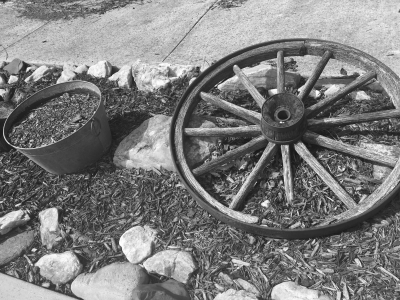

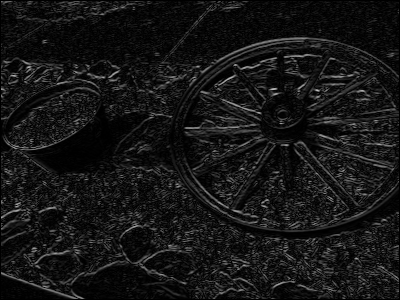

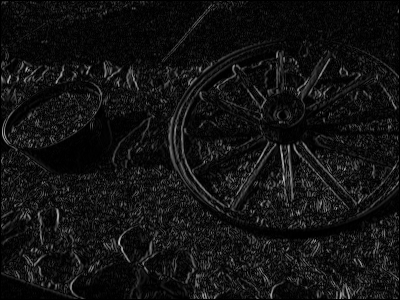

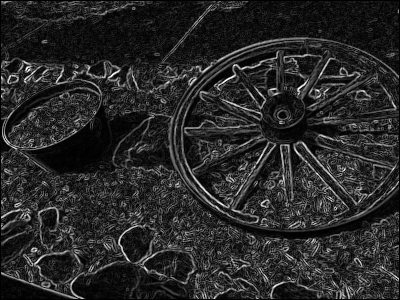

In [95]:
# TO DO: write the code
horizontal=np.array([[1, 2, 1], 
            [0, 0, 0],
            [-1, -2, -1]])/4
vertical = np.array([[-1, 0, 1], 
            [-2, 0, 2],
            [-1, 0, 1]])/4
img_result1 = linear_filter(img_grayscale, horizontal)
img_result2 = linear_filter(img_grayscale, vertical)

# Plot both images to make it easy to see that they are the same size
cv2_imshow(img_grayscale)
cv2_imshow(img_result1)
cv2_imshow(img_result2)
new_im=np.zeros([len(img_result1),len(img_result1[0])])
for i in range(0, len(img_result1)):
  for j in range(0, len(img_result1[0])):
    sum=abs(img_result1[i][j])+abs(img_result2[i][j])
    new_im[i][j]=min(np.float32(255),sum)
cv2_imshow(new_im)

---
# Problem 6: Image rotation (10 points)


Write Python/OpenCV code that will input an image, and then create *rotated* versions of the input image. Image rotation is one of the geometric transformations that we discussed in a recent lecture. 

For this problem, do not use any OpenCV functions other than basic operations for loading/saving/displaying image files. Your code must access pixel values directly, probably with nested 'for' loops. (Yes, OpenCV has built-in functions that could be used here, but you are not allowed to use them. The purpose of this problem is for you to gain a good understanding of operations at the pixel level.)

*Hint*: to avoid "holes" in your output image, write your loops to iterate over the output image, not over the input image.



In [96]:
def display_rotated_images(img_in):
  '''Create and display rotated versions of the input image.

  Input: 
    img_in: a grayscale image of any size

  Output:
    display a sequence of 6 images, each the same size as img_in;
     initialize each output image to have pixel values of 0, 
     and then map gray values from input to output;
     rotate about the *image center* in the counterclockwise (CCW) direction
     by these amounts: 15, 30, 45, 60, 75, and 90 degrees. 

  TO DO: implement the function.
  '''
  ##output image coordinates=[A]*[B]*[C]*input image coordinates
  ##output image coordinates=[D]*input image coordinates
  ##inv[D]*output image coordinates=input image coordinates
  row = len(img_in)
  col = len(img_in[0])

  A = np.array([[1,0,col/2],[0,1,row/2],[0,0,1]])
  C = np.array([[1,0,-col/2],[0,1,-row/2],[0,0,1]])
  invA = np.linalg.inv(A)
  invC = np.linalg.inv(C)
  anglearray = np.array([-15*np.pi/180, -30*np.pi/180, -45*np.pi/180, -60*np.pi/180, -75*np.pi/180, -90*np.pi/180])

  for i in range(0,6):
    #for each angle a new blank output image matrix is created 
    img_out=np.zeros((row,col),dtype=np.float32)
    B = np.array([[np.cos(anglearray[i]),-np.sin(anglearray[i]),0],[np.sin(anglearray[i]), np.cos(anglearray[i]),0],[0,0,1]])
    invB = np.linalg.inv(B)
    D=np.linalg.inv(np.matmul(np.matmul(A,B), C))
    # D = inv(C)xinv(B)xinv(A)
    # where D*output image=input image
    #D=np.matmul(invC, np.matmul(invB,invA))
    # x and y in the below loop are coordinates of the output image
    # x_in and y_in are the corresponding pixels in the input image
    # that will be mapped to the x&y of the output image.
    # in order to avoid black holes the 2 for loops are iterated over the coordinates of the
    # output matrix so, every pixel in the output will have a corresponding value.
    for x in range(col):
      for y in range(row):
        #array_in= [x_in, y_in, 1]
        array_in=np.matmul(D, np.array([x,y,1]))
        x_in = int(array_in[0])
        y_in = int(array_in[1])
        # if the x_in and y_in are out of the boundary then their value will 
        # stay as 0, which will be displayed as black.
        if x_in>-1 and x_in<col and y_in<row and y_in>-1:
          img_out[y][x]=img_in[y_in][x_in] 
    cv2_imshow(img_out)
  return img_out


Test your function. After showing the original image, the output should be a display of 6 images, each rotated CCW by an additional amount.

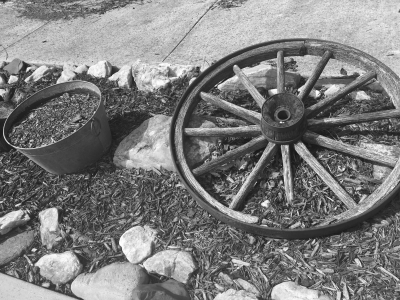

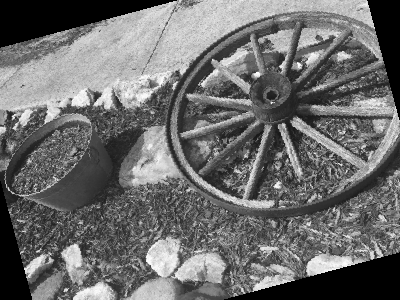

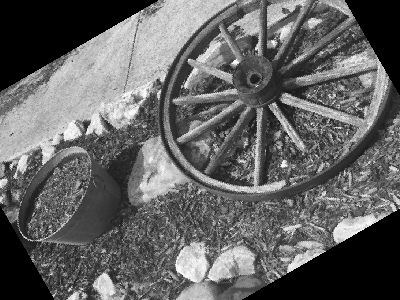

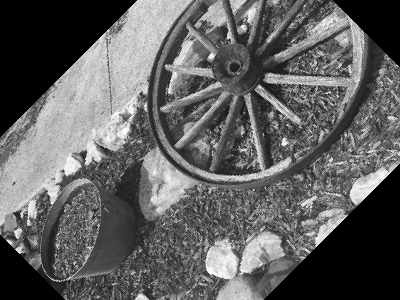

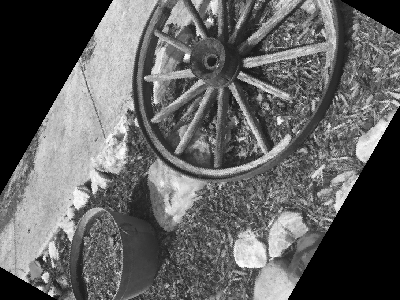

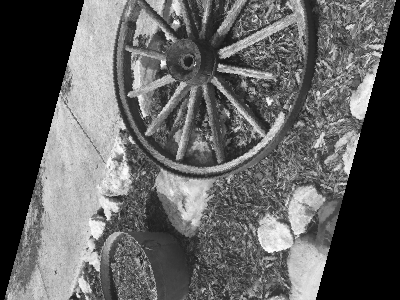

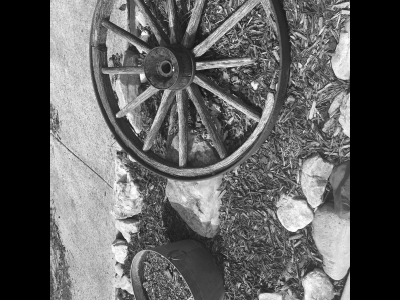

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [97]:
cv2_imshow(img_grayscale)

display_rotated_images(img_grayscale)


---
# Creating a PDF version of your current notebook

In [98]:
#The following two installation steps are needed to generate a PDF version of the notebook
#(These lines are needed within Google Colab, but are not needed within a local version of Jupyter notebook)
!apt-get -qq install texlive texlive-xetex texlive-latex-extra pandoc 
!pip install --quiet pypandoc

In [99]:
# TO DO: Provide the full path to your Jupyter notebook file
!jupyter nbconvert --to PDF "/content/drive/MyDrive/ECE5554_Computer_Vision/HW2/Homework2_DENIZAYTEMIZ.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/ECE5554_Computer_Vision/HW2/Homework2_DENIZAYTEMIZ.ipynb to PDF
[NbConvertApp] Support files will be in Homework2_DENIZAYTEMIZ_files/
[NbConvertApp] Making directory ./Homework2_DENIZAYTEMIZ_files
[NbConvertApp] Making directory ./Homework2_DENIZAYTEMIZ_files
[NbConvertApp] Making directory ./Homework2_DENIZAYTEMIZ_files
[NbConvertApp] Making directory ./Homework2_DENIZAYTEMIZ_files
[NbConvertApp] Making directory ./Homework2_DENIZAYTEMIZ_files
[NbConvertApp] Making directory ./Homework2_DENIZAYTEMIZ_files
[NbConvertApp] Making directory ./Homework2_DENIZAYTEMIZ_files
[NbConvertApp] Making directory ./Homework2_DENIZAYTEMIZ_files
[NbConvertApp] Making directory ./Homework2_DENIZAYTEMIZ_files
[NbConvertApp] Making directory ./Homework2_DENIZAYTEMIZ_files
[NbConvertApp] Making directory ./Homework2_DENIZAYTEMIZ_files
[NbConvertApp] Making directory ./Homework2_DENIZAYTEMIZ_files
[NbConvertApp] Making directory ./Homework2_DENIZAYT